In [8]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [9]:
#데이터 입력
countries = ['China', 'Korea', 'Japan', 'USA', 'Germany']
industries = ['steel', 'semi', 'car']
num_countries = len(countries)
num_industries = len(industries)

tau_factual = {
    'China': {
        'Korea': {'gim': 1.18, 'steel': 1, 'semi': 1, 'car': 1.059},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1.25, 'car': 1.2275},
        'Germany': {'gim': 1, 'steel': 1.359, 'semi': 1, 'car': 1.03}
    },
    'Korea': {
        'China': {'gim': 1.08, 'steel': 1.005, 'semi': 1.01, 'car': 1.04},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1}
    },
    'Japan': {
        'China': {'gim': 1.175, 'steel': 1.044, 'semi': 1, 'car': 1.077},
        'Korea': {'gim': 1.2, 'steel': 1, 'semi': 1, 'car': 1.065},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1.0212},
        'Germany': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1}
    },
    'USA': {
        'China': {'gim': 1.2, 'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1.03}
    },
    'Germany': {
        'China': {'gim': 1.2, 'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1.0212}
    }
}

factual_tariffs = {country: pd.DataFrame.from_dict(data, orient='index') for country, data in tau_factual.items()}

In [11]:
#데이터 불러오기
directory = '/Users/minjiku/Desktop/2024GE학술제'

optimal_tariffs = {}
for country in ['China', 'Korea', 'Japan', 'USA', 'Germany']:
    file_path = os.path.join(directory, f'{country}_optimal_tariffs.csv')
    df = pd.read_csv(file_path, index_col=0)
    optimal_tariffs[country] = df

시각화

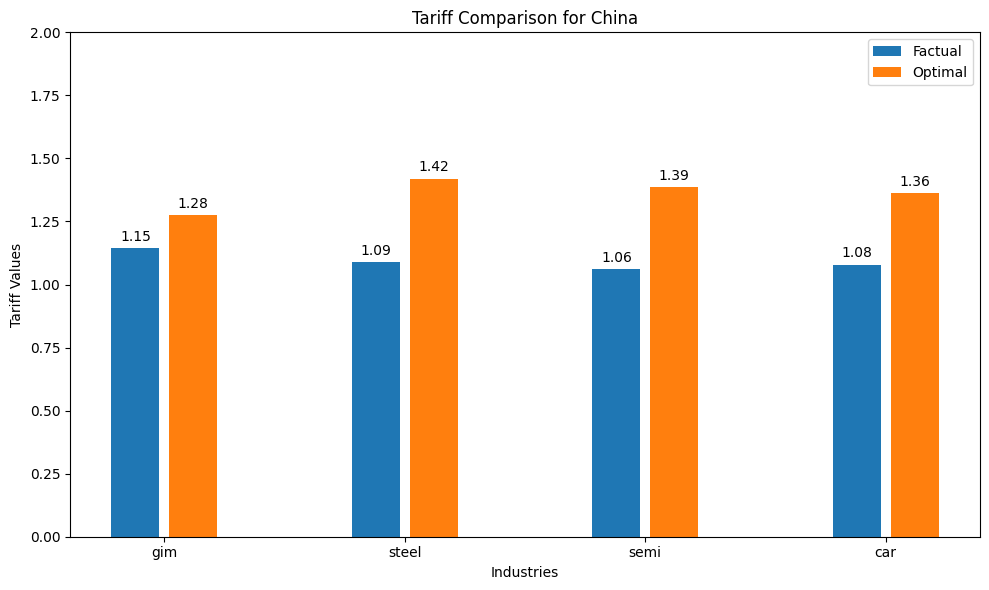

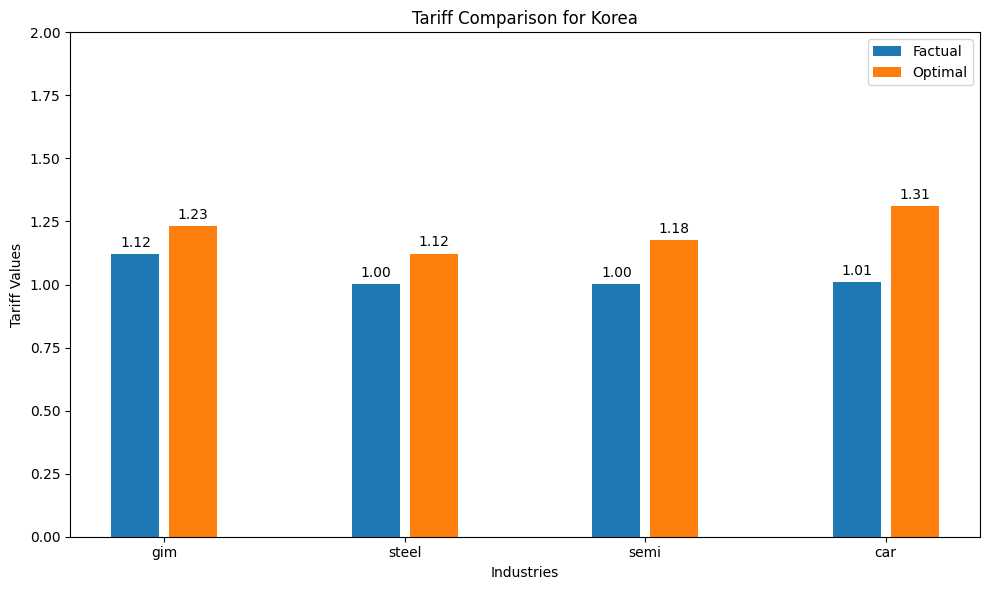

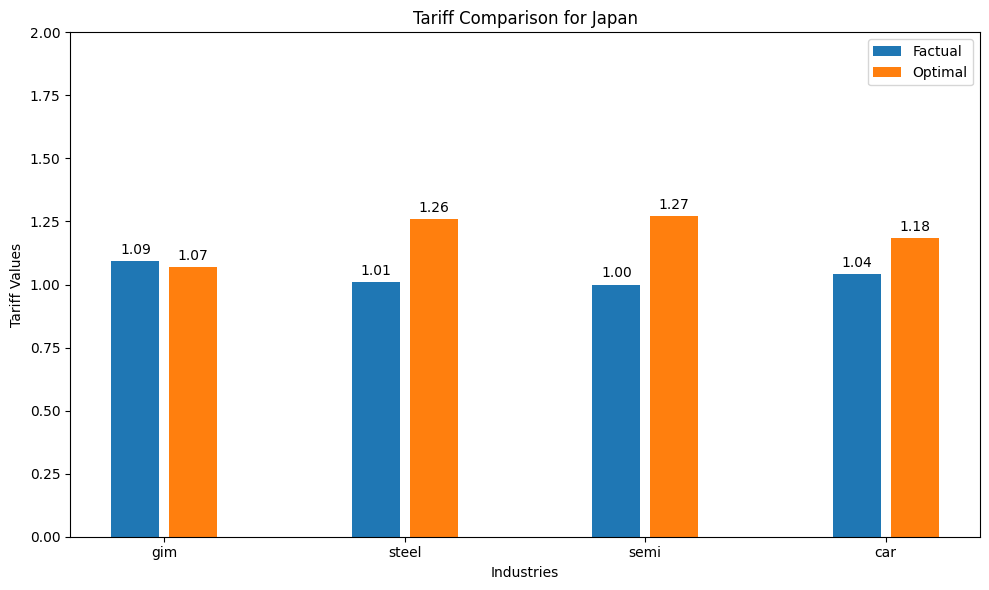

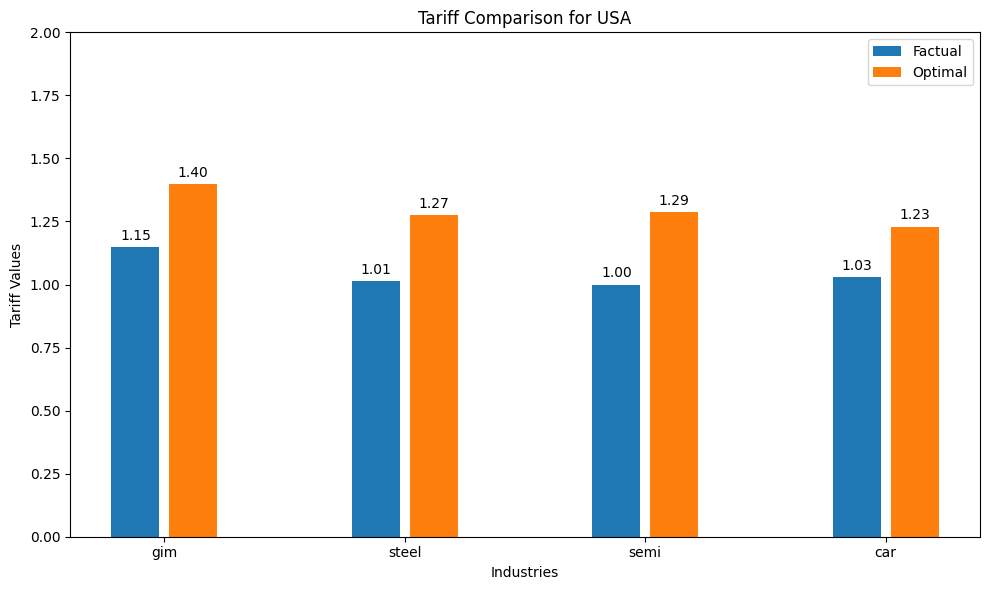

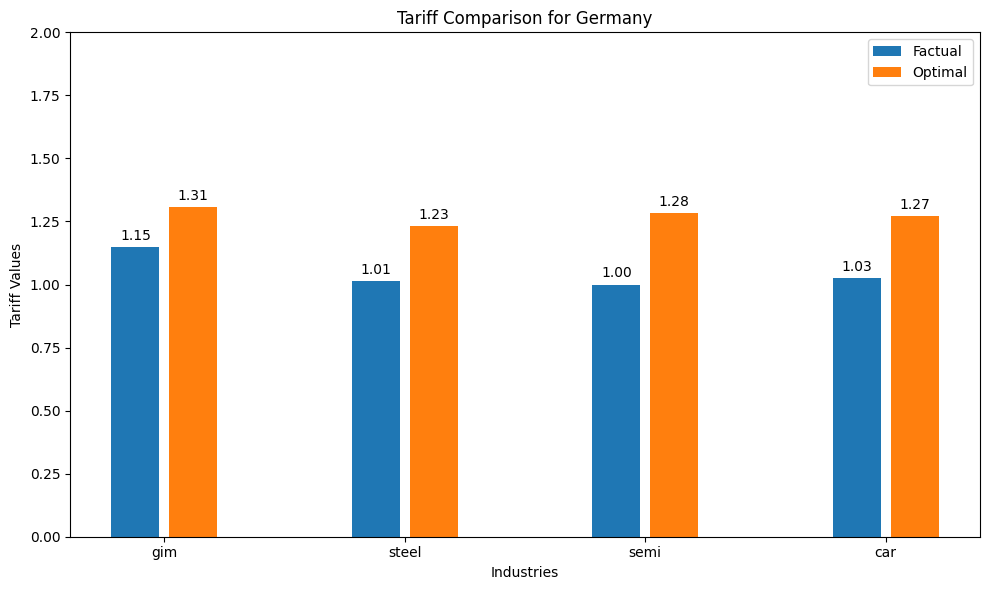

In [20]:
#viz
# 시각화 설정
num_industries = len(list(tau_factual['China']['Korea'].keys()))
ind = np.arange(num_industries)  # the x locations for the groups
width = 0.2  # the width of the bars

# 국가별로 시각화
for country in ['China', 'Korea', 'Japan', 'USA', 'Germany']:
    factual_df = factual_tariffs[country]
    optimal_df = optimal_tariffs[country]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # factual 값을 막대로 표시
    rects1 = ax.bar(ind - width/2 - 0.02, factual_df.T.mean(axis=1), width, label='Factual')
    # optimal 값을 막대로 표시
    rects2 = ax.bar(ind + width/2 + 0.02, optimal_df.T.mean(axis=1), width, label='Optimal')
    
    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')
    ax.set_ylim([0,2.0])
    # 제목과 레이블 설정
    ax.set_xlabel('Industries')
    ax.set_ylabel('Tariff Values')
    ax.set_title(f'Tariff Comparison for {country}')
    ax.set_xticks(ind)
    ax.set_xticklabels(factual_df.columns)
    ax.legend()
    
    # 그래프 표시
    plt.xticks()
    plt.tight_layout()
    plt.show()
